In [699]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from config import settings

## Data Loading

In [700]:
df_train = pd.read_csv(os.path.join(settings.DATA_DIR, "processed", "train_folds.csv"))
df_test = pd.read_csv(os.path.join(settings.DATA_DIR, "processed", "test.csv"))
df_ss = pd.read_csv(
    os.path.join(settings.DATA_DIR, "processed", "sample_submission.csv")
)

## Data Analysis

In [701]:
df_ss.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [702]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,kfold
0,FDI28,14.300,Low Fat,0.026300,Frozen Foods,79.4302,OUT013,1987,High,Tier 3,Supermarket Type1,1743.0644,0
1,NCM17,7.930,Low Fat,0.071136,Health and Hygiene,42.7086,OUT046,1997,Small,Tier 1,Supermarket Type1,356.8688,0
2,FDC14,14.500,Regular,0.041313,Canned,42.0454,OUT049,1999,Medium,Tier 1,Supermarket Type1,377.5086,0
3,DRC36,NaN,Regular,0.044767,Soft Drinks,173.7054,OUT027,1985,Medium,Tier 3,Supermarket Type3,5778.4782,0
4,FDS27,10.195,Regular,0.012456,Meat,197.5110,OUT035,2004,Small,Tier 2,Supermarket Type1,2356.9320,0


In [703]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  kfold                      8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [704]:
idx_cols = ["Item_Identifier", "Outlet_Identifier"]
target_col = "Item_Outlet_Sales"
feature_cols = df_train.drop(["kfold", target_col] + idx_cols, axis=1).columns.tolist()

### Missing values 

In [705]:
df_train[df_train.Item_Identifier == "DRC36"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,kfold
3,DRC36,NaN,Regular,0.044767,Soft Drinks,173.7054,OUT027,1985,Medium,Tier 3,Supermarket Type3,5778.4782,0
4647,DRC36,13.0,reg,0.044976,Soft Drinks,176.2054,OUT035,2004,Small,Tier 2,Supermarket Type1,1225.7378,2
5132,DRC36,13.0,Regular,0.000000,Soft Drinks,173.6054,OUT013,1987,High,Tier 3,Supermarket Type1,1751.0540,2
7062,DRC36,13.0,Regular,0.044985,Soft Drinks,175.0054,OUT046,1997,Small,Tier 1,Supermarket Type1,1926.1594,4
7164,DRC36,13.0,Regular,0.045239,Soft Drinks,174.1054,OUT017,2007,NaN,Tier 2,Supermarket Type1,4377.6350,4


In [706]:
df_train["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [707]:
df_train["Item_Weight"] = df_train["Item_Weight"].fillna(0).astype(np.float64)
df_test["Item_Weight"] = df_test["Item_Weight"].fillna(0).astype(np.float64)
df_train["Outlet_Size"] = df_train["Outlet_Size"].fillna("Miss").astype(str)
df_test["Outlet_Size"] = df_test["Outlet_Size"].fillna("Miss").astype(str)

In [708]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  kfold                      8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

## categorical columns

In [709]:
cat_cols = []
for col in feature_cols:
    if df_train[col].dtype == "object":
        print(f"{col}: {df_train[col].nunique()}")
        if df_train[col].nunique() < 30:
            cat_cols.append(col)
print(cat_cols)

Item_Fat_Content: 5
Item_Type: 16
Outlet_Size: 4
Outlet_Location_Type: 3
Outlet_Type: 4
['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [710]:
num_cols = []
for col in feature_cols:
    if col not in cat_cols:
        print(f"{col}: {df_train[col].dtype}")
        num_cols.append(col)
print(num_cols)

Item_Weight: float64
Item_Visibility: float64
Item_MRP: float64
Outlet_Establishment_Year: int64
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


In [711]:
print(f"cat_cols: {len(cat_cols)}")
print(f"num_cols: {len(num_cols)}")
print(f"feature_cols: {len(feature_cols)}")

cat_cols: 5
num_cols: 4
feature_cols: 9


## Cat Encoder

In [712]:
cat_cols_fe = []
cat_cols_remove = []
for idx, col in enumerate(cat_cols):
    print(f"{idx} : {col}: {df_train[col].nunique()}")


0 : Item_Fat_Content: 5
1 : Item_Type: 16
2 : Outlet_Size: 4
3 : Outlet_Location_Type: 3
4 : Outlet_Type: 4


In [713]:
idx = 0
print(df_train[cat_cols[idx]].value_counts())
print("---")
print(df_test[cat_cols[idx]].value_counts())
print("---")
print(df_train[cat_cols[idx]].isnull().sum())
print("---")
print(df_test[cat_cols[idx]].isnull().sum())

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
---
Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64
---
0
---
0


In [714]:
def Item_Fat_Content_fn(x):
    if x in ["Low Fat", "LF", "low fat"]:
        return 0
    elif x in ["reg", "Regular"]:
        return 1
    else:
        return 2


df_train["Item_Fat_Content"] = df_train["Item_Fat_Content"].apply(Item_Fat_Content_fn)
df_test["Item_Fat_Content"] = df_test["Item_Fat_Content"].apply(Item_Fat_Content_fn)
cat_cols_fe.append("Item_Fat_Content")

In [715]:
idx = 1
# print(df_train[cat_cols[idx]].value_counts())
print(df_train[cat_cols[idx]].nunique())
print("---")
# print(df_test[cat_cols[idx]].value_counts())
print(df_test[cat_cols[idx]].nunique())
print("---")
print(df_train[cat_cols[idx]].isnull().sum())
print("---")
print(df_test[cat_cols[idx]].isnull().sum())

16
---
16
---
0
---
0


In [716]:
from feature_engine.encoding import OneHotEncoder

ohe = OneHotEncoder()
df_train_ohe = ohe.fit_transform(df_train[[cat_cols[idx]]])
df_test_ohe = ohe.transform(df_test[[cat_cols[idx]]])

df_train = pd.concat([df_train, df_train_ohe], axis=1).drop(cat_cols[idx], axis=1)
df_test = pd.concat([df_test, df_test_ohe], axis=1).drop(cat_cols[idx], axis=1)
cat_cols_remove.append(cat_cols[idx])
cat_cols_fe.extend(df_train_ohe.columns.tolist())

In [717]:
idx = 2
print(df_train[cat_cols[idx]].value_counts())
# print(df_train[cat_cols[idx]].nunique())
print("---")
print(df_test[cat_cols[idx]].value_counts())
# print(df_test[cat_cols[idx]].nunique())
print("---")
print(df_train[cat_cols[idx]].isnull().sum())
print("---")
print(df_test[cat_cols[idx]].isnull().sum())

Outlet_Size
Medium    2793
Miss      2410
Small     2388
High       932
Name: count, dtype: int64
---
Outlet_Size
Medium    1862
Miss      1606
Small     1592
High       621
Name: count, dtype: int64
---
0
---
0


In [718]:
def Outlet_Size_fn(x):
    if x == "Miss":
        return 0
    elif x == "Small":
        return 1
    elif x == "Medium":
        return 2
    else:
        return 3


df_train["Outlet_Size"] = df_train["Outlet_Size"].apply(Outlet_Size_fn)
df_test["Outlet_Size"] = df_test["Outlet_Size"].apply(Outlet_Size_fn)
cat_cols_fe.append("Outlet_Size")
print(cat_cols_fe)

['Item_Fat_Content', 'Item_Type_Frozen Foods', 'Item_Type_Health and Hygiene', 'Item_Type_Canned', 'Item_Type_Soft Drinks', 'Item_Type_Meat', 'Item_Type_Snack Foods', 'Item_Type_Baking Goods', 'Item_Type_Household', 'Item_Type_Dairy', 'Item_Type_Fruits and Vegetables', 'Item_Type_Seafood', 'Item_Type_Breakfast', 'Item_Type_Breads', 'Item_Type_Starchy Foods', 'Item_Type_Others', 'Item_Type_Hard Drinks', 'Outlet_Size']


In [719]:
idx = 3
print(df_train[cat_cols[idx]].value_counts())
# print(df_train[cat_cols[idx]].nunique())
print("---")
print(df_test[cat_cols[idx]].value_counts())
# print(df_test[cat_cols[idx]].nunique())
print("---")
print(df_train[cat_cols[idx]].isnull().sum())
print("---")
print(df_test[cat_cols[idx]].isnull().sum())

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64
---
Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: count, dtype: int64
---
0
---
0


In [720]:
def Outlet_Location_Type_fn(x):
    if x == "Tier 1":
        return 1
    elif x == "Tier 2":
        return 2
    else:
        return 3


df_train["Outlet_Location_Type"] = df_train["Outlet_Location_Type"].apply(
    Outlet_Location_Type_fn
)
df_test["Outlet_Location_Type"] = df_test["Outlet_Location_Type"].apply(
    Outlet_Location_Type_fn
)
cat_cols_fe.append("Outlet_Location_Type")
print(cat_cols_fe)

['Item_Fat_Content', 'Item_Type_Frozen Foods', 'Item_Type_Health and Hygiene', 'Item_Type_Canned', 'Item_Type_Soft Drinks', 'Item_Type_Meat', 'Item_Type_Snack Foods', 'Item_Type_Baking Goods', 'Item_Type_Household', 'Item_Type_Dairy', 'Item_Type_Fruits and Vegetables', 'Item_Type_Seafood', 'Item_Type_Breakfast', 'Item_Type_Breads', 'Item_Type_Starchy Foods', 'Item_Type_Others', 'Item_Type_Hard Drinks', 'Outlet_Size', 'Outlet_Location_Type']


In [721]:
idx = 4
print(df_train[cat_cols[idx]].value_counts())
print(df_train[cat_cols[idx]].nunique())
print("---")
print(df_test[cat_cols[idx]].value_counts())
print(df_test[cat_cols[idx]].nunique())
print("---")
print(df_train[cat_cols[idx]].isnull().sum())
print("---")
print(df_test[cat_cols[idx]].isnull().sum())

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64
4
---
Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: count, dtype: int64
4
---
0
---
0


In [722]:
ohe4 = OneHotEncoder()
df_train_ohe = ohe4.fit_transform(df_train[[cat_cols[idx]]])
df_test_ohe = ohe4.transform(df_test[[cat_cols[idx]]])

df_train = pd.concat([df_train, df_train_ohe], axis=1).drop(cat_cols[idx], axis=1)
df_test = pd.concat([df_test, df_test_ohe], axis=1).drop(cat_cols[idx], axis=1)
cat_cols_remove.append(cat_cols[idx])
cat_cols_fe.extend(df_train_ohe.columns.tolist())

In [723]:
print(cat_cols_fe)
print(cat_cols_remove)

['Item_Fat_Content', 'Item_Type_Frozen Foods', 'Item_Type_Health and Hygiene', 'Item_Type_Canned', 'Item_Type_Soft Drinks', 'Item_Type_Meat', 'Item_Type_Snack Foods', 'Item_Type_Baking Goods', 'Item_Type_Household', 'Item_Type_Dairy', 'Item_Type_Fruits and Vegetables', 'Item_Type_Seafood', 'Item_Type_Breakfast', 'Item_Type_Breads', 'Item_Type_Starchy Foods', 'Item_Type_Others', 'Item_Type_Hard Drinks', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type3', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Grocery Store']
['Item_Type', 'Outlet_Type']


In [724]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Fat_Content                 8523 non-null   int64  
 3   Item_Visibility                  8523 non-null   float64
 4   Item_MRP                         8523 non-null   float64
 5   Outlet_Identifier                8523 non-null   object 
 6   Outlet_Establishment_Year        8523 non-null   int64  
 7   Outlet_Size                      8523 non-null   int64  
 8   Outlet_Location_Type             8523 non-null   int64  
 9   Item_Outlet_Sales                8523 non-null   float64
 10  kfold                            8523 non-null   int64  
 11  Item_Type_Frozen Foods           8523 non-null   int64  
 12  Item_Type_Health and

## Numerical Columns

In [725]:
num_cols_fe = []
for col in num_cols:
    if col not in cat_cols_remove:
        print(f"{col}: {df_train[col].dtype}")
        num_cols_fe.append(col)
print(num_cols_fe)

Item_Weight: float64
Item_Visibility: float64
Item_MRP: float64
Outlet_Establishment_Year: int64
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


In [726]:
df_train["Outlet_Establishment_Year"].value_counts(
    normalize=True
).sort_index().to_dict()

{1985: 0.1716531737651062,
 1987: 0.10935116742930893,
 1997: 0.1091165082717353,
 1998: 0.06511791622668074,
 1999: 0.1091165082717353,
 2002: 0.10899917869294849,
 2004: 0.1091165082717353,
 2007: 0.10864718995658805,
 2009: 0.10888184911416168}

In [727]:
df_test["Outlet_Establishment_Year"].value_counts(normalize=True).sort_index().to_dict()

{1985: 0.17180073930646014,
 1987: 0.10931174089068826,
 1997: 0.10913571554303819,
 1998: 0.06512937863052279,
 1999: 0.10913571554303819,
 2002: 0.10895969019538813,
 2004: 0.10913571554303819,
 2007: 0.10860763950008802,
 2009: 0.10878366484773808}

In [728]:
freq_dict = (
    df_train["Outlet_Establishment_Year"]
    .value_counts(normalize=True)
    .sort_index()
    .to_dict()
)
ordinal_dict = {
    1985: 1,
    1987: 2,
    1997: 3,
    1998: 4,
    1999: 5,
    2002: 6,
    2004: 7,
    2007: 8,
    2009: 9,
}
df_train["Outlet_Establishment_Year_ordinal"] = df_train[
    "Outlet_Establishment_Year"
].map(ordinal_dict)
df_train["Outlet_Establishment_Year_freq"] = df_train["Outlet_Establishment_Year"].map(
    freq_dict
)
df_test["Outlet_Establishment_Year_ordinal"] = df_test["Outlet_Establishment_Year"].map(
    ordinal_dict
)
df_test["Outlet_Establishment_Year_freq"] = df_test["Outlet_Establishment_Year"].map(
    freq_dict
)
df_train = df_train.drop("Outlet_Establishment_Year", axis=1)
df_test = df_test.drop("Outlet_Establishment_Year", axis=1)
num_cols_fe.remove("Outlet_Establishment_Year")
num_cols_fe.append("Outlet_Establishment_Year_ordinal")
num_cols_fe.append("Outlet_Establishment_Year_freq")
print(num_cols_fe)


['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year_ordinal', 'Outlet_Establishment_Year_freq']


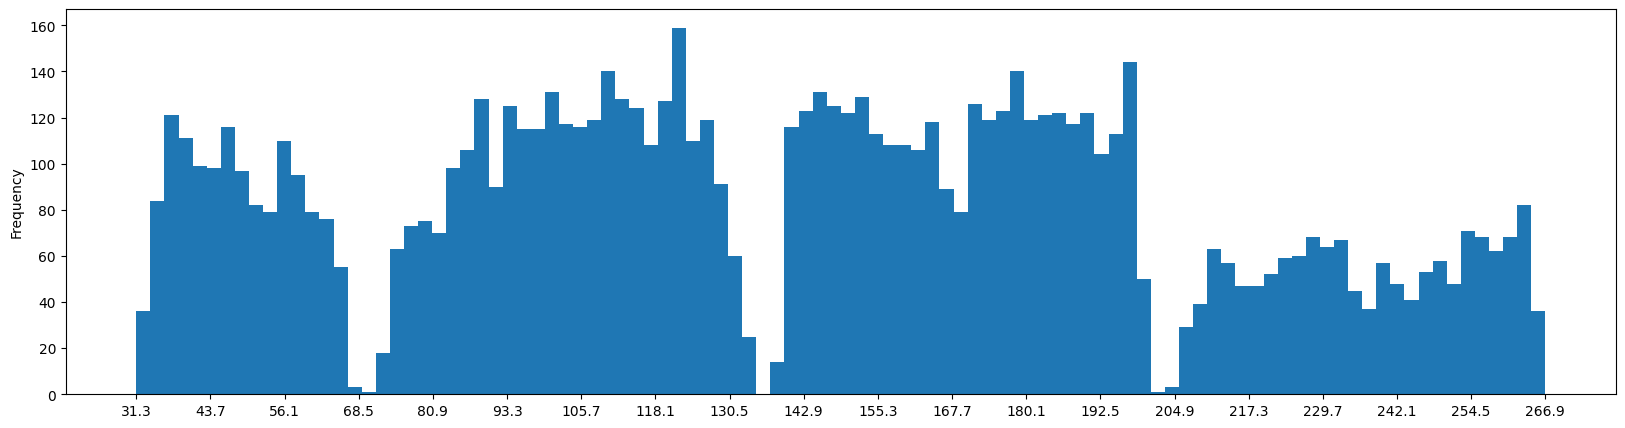

In [729]:
# Plot the histogram
df_train["Item_MRP"].plot(kind="hist", bins=100, figsize=(20, 5))

# Get min and max for the range
min_val = df_train["Item_MRP"].min()
max_val = df_train["Item_MRP"].max()

# Create 20 evenly spaced tick values
tick_values = np.linspace(min_val, max_val, 20)

# Set the ticks with appropriate size
plt.xticks(tick_values, fontsize=10)

# Show the plot
plt.show()

In [730]:
def Item_MRP_fn(x):
    if x > 0 and x < 70:
        return 1
    elif x >= 70 and x < 140:
        return 2
    elif x >= 140 and x < 200:
        return 3
    else:
        return 4


df_train["Item_MRP_segment"] = df_train["Item_MRP"].apply(Item_MRP_fn)
df_test["Item_MRP_segment"] = df_test["Item_MRP"].apply(Item_MRP_fn)
num_cols_fe.append("Item_MRP_segment")
print(num_cols_fe)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year_ordinal', 'Outlet_Establishment_Year_freq', 'Item_MRP_segment']


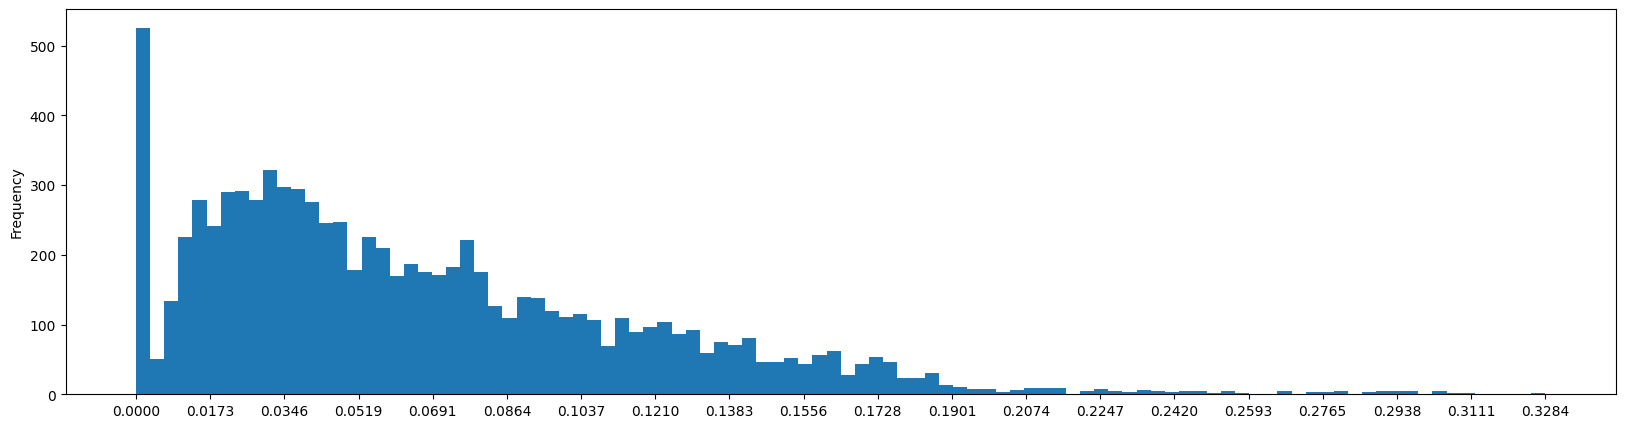

In [731]:
# 'Item_Weight', 'Item_Visibility'

# Plot the histogram
df_train["Item_Visibility"].plot(kind="hist", bins=100, figsize=(20, 5))

# Get min and max for the range
min_val = df_train["Item_Visibility"].min()
max_val = df_train["Item_Visibility"].max()

# Create 20 evenly spaced tick values
tick_values = np.linspace(min_val, max_val, 20)

# Set the ticks with appropriate size
plt.xticks(tick_values, fontsize=10)

# Show the plot
plt.show()

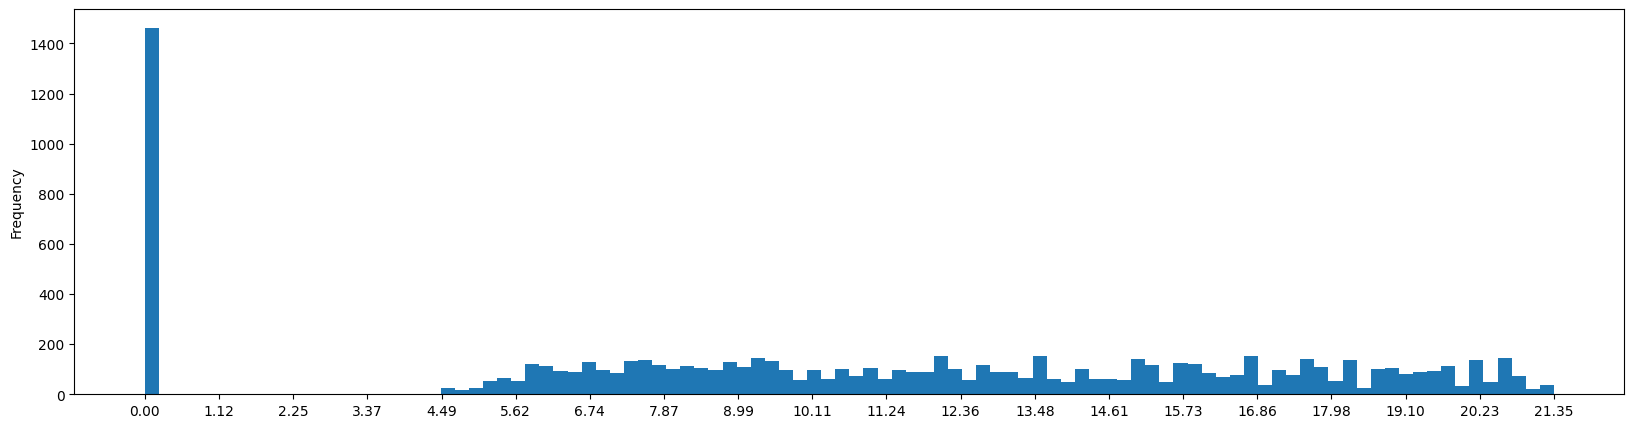

In [732]:
# 'Item_Weight', 'Item_Visibility'

# Plot the histogram
df_train["Item_Weight"].plot(kind="hist", bins=100, figsize=(20, 5))

# Get min and max for the range
min_val = df_train["Item_Weight"].min()
max_val = df_train["Item_Weight"].max()

# Create 20 evenly spaced tick values
tick_values = np.linspace(min_val, max_val, 20)

# Set the ticks with appropriate size
plt.xticks(tick_values, fontsize=10)

# Show the plot
plt.show()

In [733]:
df_train.shape, df_test.shape

((8523, 33), (5681, 31))

In [734]:
print(df_train.columns.tolist())
print("---")
print(df_test.columns.tolist())

['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales', 'kfold', 'Item_Type_Frozen Foods', 'Item_Type_Health and Hygiene', 'Item_Type_Canned', 'Item_Type_Soft Drinks', 'Item_Type_Meat', 'Item_Type_Snack Foods', 'Item_Type_Baking Goods', 'Item_Type_Household', 'Item_Type_Dairy', 'Item_Type_Fruits and Vegetables', 'Item_Type_Seafood', 'Item_Type_Breakfast', 'Item_Type_Breads', 'Item_Type_Starchy Foods', 'Item_Type_Others', 'Item_Type_Hard Drinks', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type3', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Grocery Store', 'Outlet_Establishment_Year_ordinal', 'Outlet_Establishment_Year_freq', 'Item_MRP_segment']
---
['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Type_Frozen Foods', 'Item_Type_Health and Hygiene', 'Item_Type_C

In [735]:
print(set(df_train.columns.tolist()) - set(df_test.columns.tolist()))

{'kfold', 'Item_Outlet_Sales'}


In [737]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Identifier                    8523 non-null   object 
 1   Item_Weight                        8523 non-null   float64
 2   Item_Fat_Content                   8523 non-null   int64  
 3   Item_Visibility                    8523 non-null   float64
 4   Item_MRP                           8523 non-null   float64
 5   Outlet_Identifier                  8523 non-null   object 
 6   Outlet_Size                        8523 non-null   int64  
 7   Outlet_Location_Type               8523 non-null   int64  
 8   Item_Outlet_Sales                  8523 non-null   float64
 9   kfold                              8523 non-null   int64  
 10  Item_Type_Frozen Foods             8523 non-null   int64  
 11  Item_Type_Health and Hygiene       8523 non-null   int64

In [736]:
# save the processed data
output_dir = os.path.join(settings.DATA_DIR, "fe", "00")
os.makedirs(output_dir, exist_ok=True)
df_train.to_csv(os.path.join(output_dir, "train_folds.csv"), index=False)
df_test.to_csv(os.path.join(output_dir, "test.csv"), index=False)
df_ss.to_csv(os.path.join(output_dir, "ss.csv"), index=False)